image.png


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center> Practice Project V </center></h1>

<h1><center>Personal Loan Approval Using Decision Trees</center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford Osumanu </center></h1>



<h1><center>December  2022 </center></h1>


image.png


<h1><center><font size=10><a name='link6'>Artificial Intelligence and Machine Learning is the Oxgyen to Today's Business</a></center></font></h1>




image.png

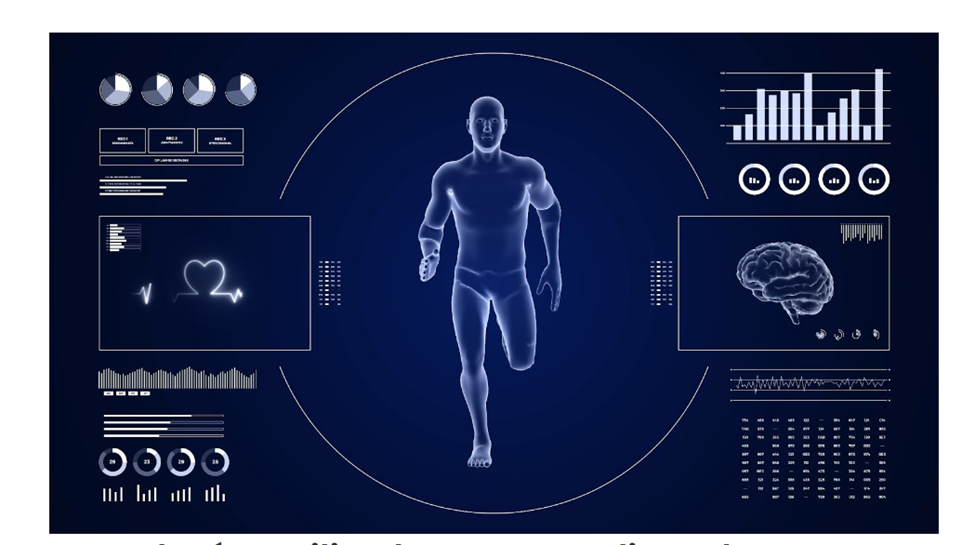

image.png

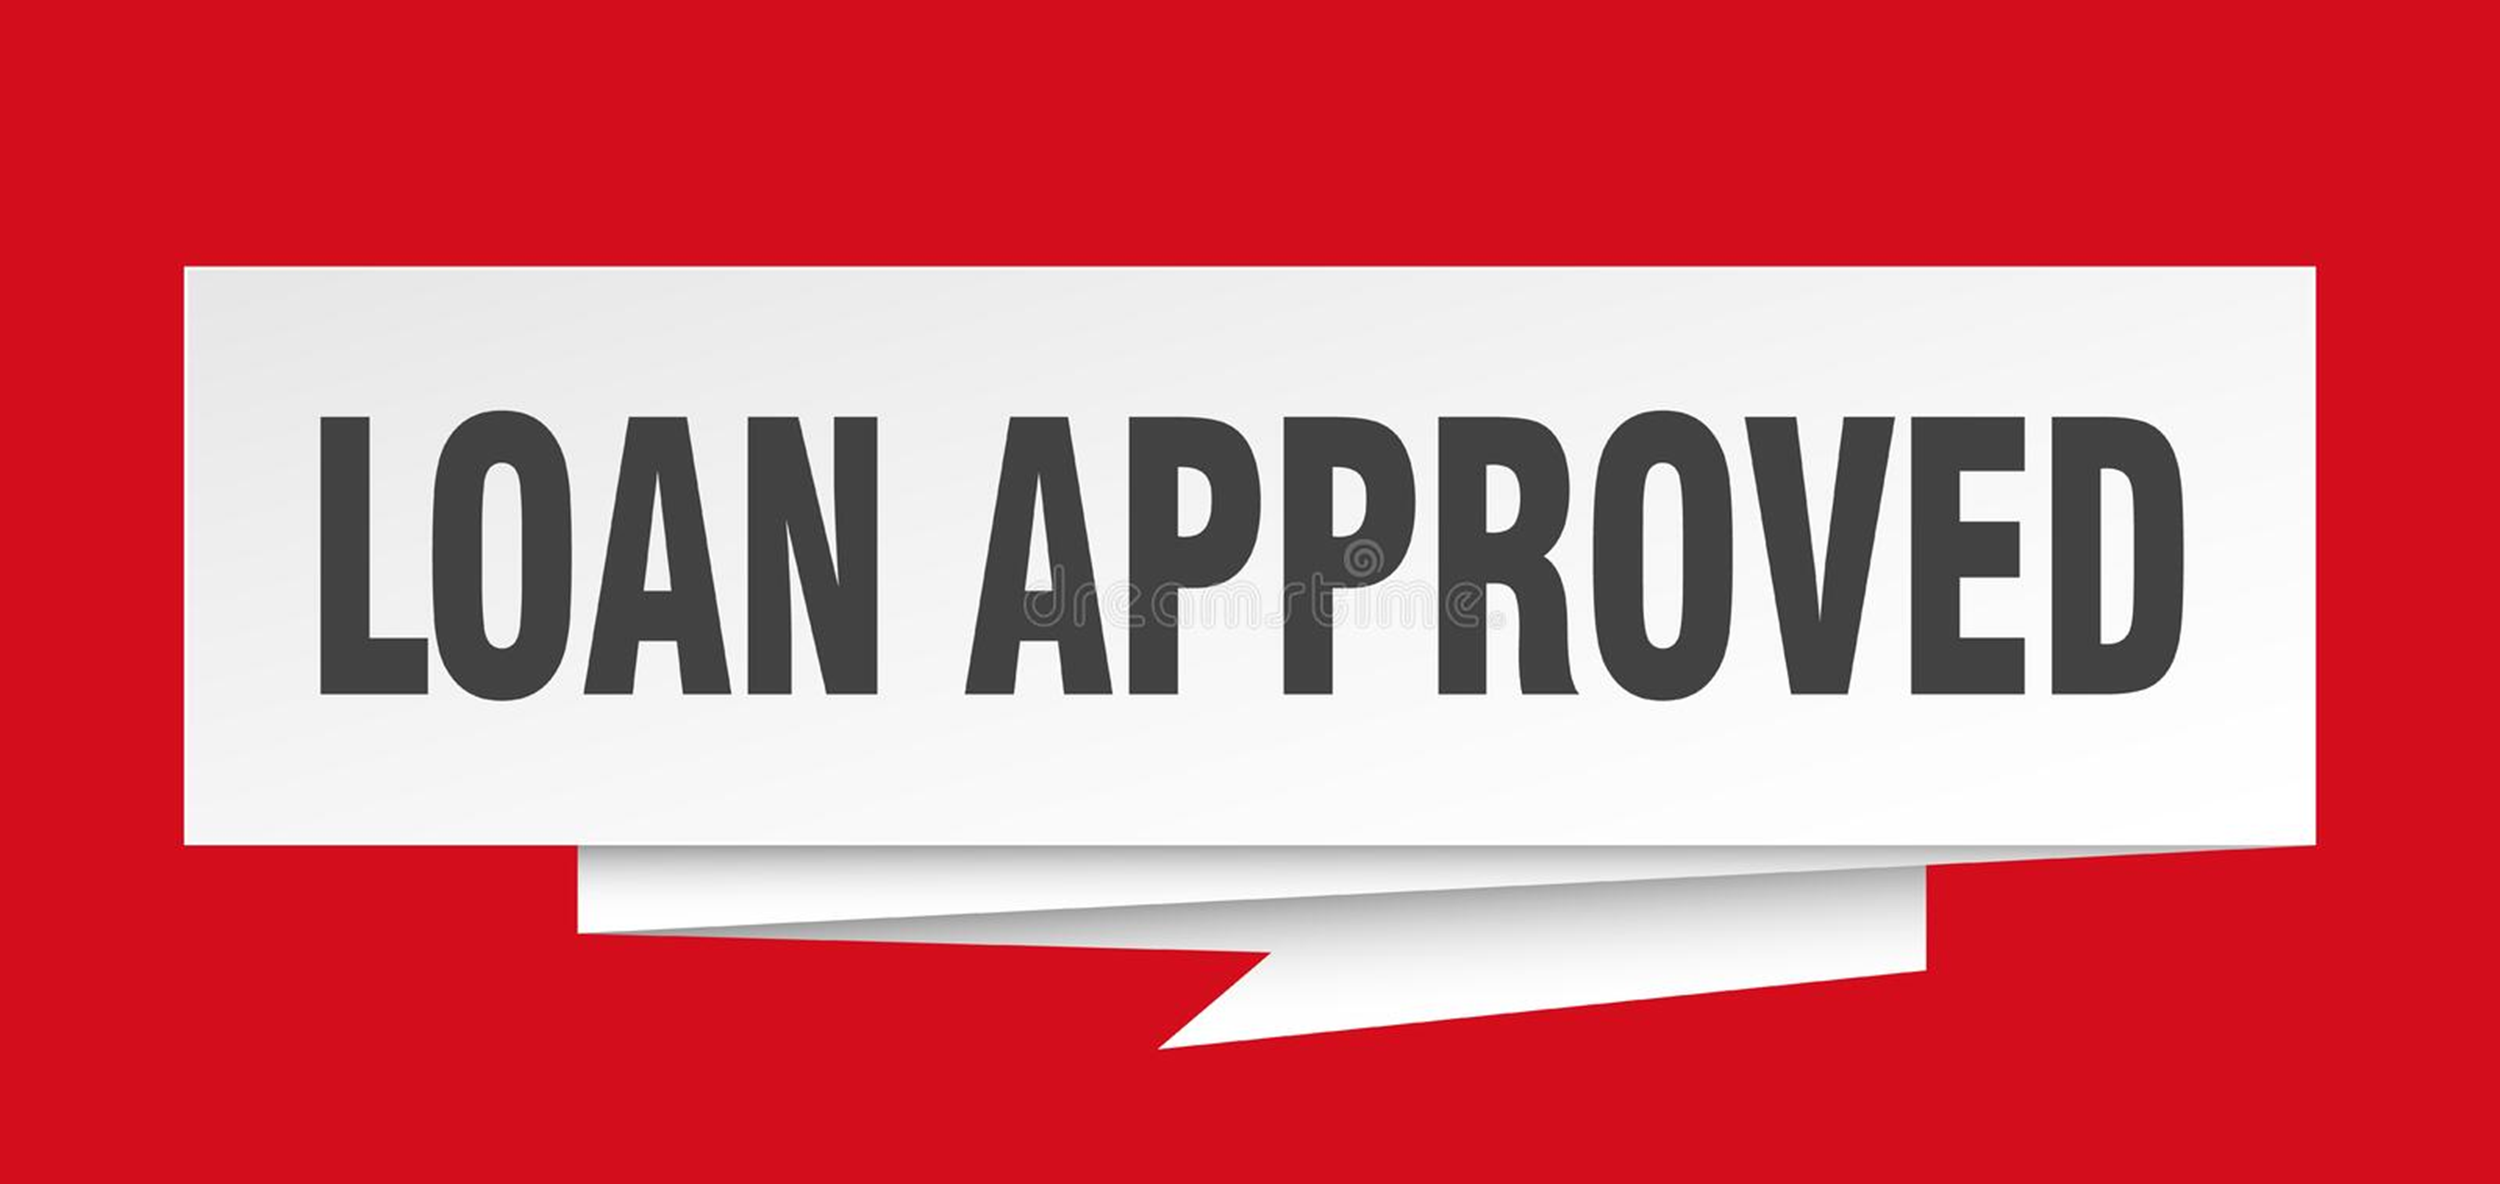

image.png

# Data Analysis Philosophy

In [5]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


image.png

# Problem Statement

### Objective

To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized and identify the factors that drive the behavior of loan delinquency.

### Dataset
* ID: Customer ID
* Delinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)
* loan_term: Loan term in months
* gender: Gender of the borrower
* age: Age of the borrower
* purpose: Purpose of Loan
* home_ownership: Status of borrower's home
* credit score: Credit Score of the borrower

image.png

# Loading Libraries

In [6]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# Reading the Data into a DataFrame

## Loading data

In [7]:
# Reading the data from the local drive
loan_data = pd.read_csv("C:/Users/hayfo/OneDrive/Desktop/Data Publication/capital_loan.csv")

In [8]:
#loan_data = pd.read_csv("capital_loan.csv")

In [9]:
# copying data to another varaible to avoid any changes to original data
data = loan_data.copy()

# Overview of the data

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [10]:
# Creating  a well readable header label
for header in data.columns:
    header_replace = header.replace(
        " ", "_"
    )  # creates new header with "_" instead of " ".
    data.rename(
        {header: header_replace}, axis=1, inplace=True
    )  # sets new header as header made in line above

### View the first and last 5 rows of the dataset.

In [11]:
data.head()

,ID,delinquent,term,gender,loan_purpose,home_ownership,age,credit_score
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [12]:
data.tail()

,ID,delinquent,term,gender,loan_purpose,home_ownership,age,credit_score
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


### Dimension of the Dataset

In [13]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 11548 rows and 8 columns.


In [14]:
# Checking the dimension (number of observations/rows and variables/columns of the Dataset (df.shape)
print("There are", data.shape[0], "rows and", data.shape[1], "columns.")

There are 11548 rows and 8 columns.


image.png

### Data Types of the Dataset

In [15]:
# Checking the data types of the variables/columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   loan_purpose    11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   credit_score    11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


## Checking the Missing Values of the Dataset

In [16]:
# Checking for missing values in the dataset
data.isnull().sum()

ID                0
delinquent        0
term              0
gender            0
loan_purpose      0
home_ownership    0
age               0
credit_score      0
dtype: int64

In [17]:
# Checking the total number of missing values in the dataset
data.isnull().sum().sum()

0

image.png

## Checking the Duplicates in the Dataset

In [18]:
# checking for duplicate values
print("There are about: ", data.duplicated().sum(), "dupplicates in the dataset")

There are about:  0 dupplicates in the dataset


image.png

## Removing Duplicates from the Dataset

In [19]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   loan_purpose    11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   credit_score    11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


There are no duplicates in the data

image.png

## Data Sanity Checks: Deep Checking/scrutinity of the the dataset before EDA

### Data Types of the Dataset

In [20]:
# Checking the datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   loan_purpose    11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   credit_score    11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


### Overview of Categorical/Object Variables

In [21]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    # print("cat_col")

36 months    10589
60 months      959
Name: term, dtype: int64
Male      6555
Female    4993
Name: gender, dtype: int64
House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: loan_purpose, dtype: int64
Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64
20-25    5888
>25      5660
Name: age, dtype: int64
300-500    6370
>500       5178
Name: credit_score, dtype: int64


image.png

# Part II: Exploratory Data Analysis (EDA)

image.png

## Statistical summary of the numerical columns in both train and test dataset

### Statistical Summary of the Dataset

In [22]:
# let's view the statistical summary of minimum numerical columns in the data
data.describe(include="all")

,ID,delinquent,term,gender,loan_purpose,home_ownership,age,credit_score
count,11548.000000,11548.000000,11548,11548,11548,11548,11548,11548
unique,NaN,NaN,2,2,7,3,2,2
top,NaN,NaN,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,NaN,10589,6555,6892,5461,5888,6370
mean,5774.500000,0.668601,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,0.470737,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


image.png

## Graphical Univariate Analysis

In [23]:
len(data.columns)

8

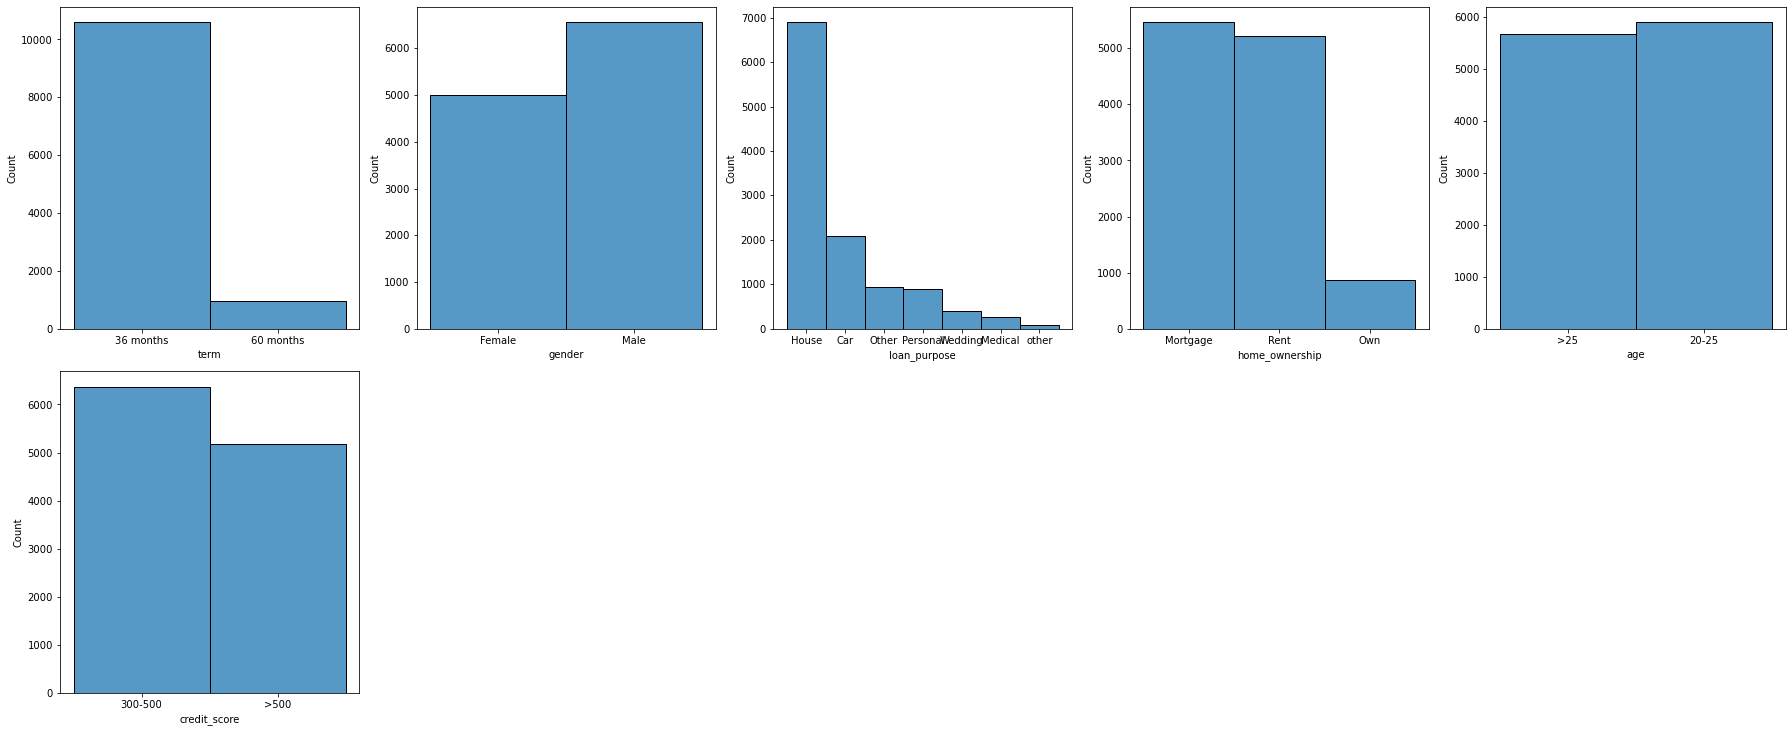

In [24]:
# Checking the histogram plot  of the entire dataset
cols = 5
rows = 5
num_cols = data.select_dtypes(include="object").columns
fig = plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.histplot(x=data[col], ax=ax)

fig.tight_layout()
plt.show()

image.png

image.png

In [25]:
data.columns

Index(['ID', 'delinquent', 'term', 'gender', 'loan_purpose', 'home_ownership',
       'age', 'credit_score'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   delinquent      11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   loan_purpose    11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   credit_score    11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


* Since all the values in ID column are unique we can drop it

In [27]:
data.drop(["ID"], axis=1, inplace=True)

image.png

## Exploratory Data Analysis (EDA)

**The below functions need to be defined to carry out the EDA.**

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

image.png

In [29]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

image.png

# Univariate analysis

In [30]:
data.columns

Index(['delinquent', 'term', 'gender', 'loan_purpose', 'home_ownership', 'age',
       'credit_score'],
      dtype='object')

image.png

## Observations of Delinquent 

In [31]:
data["delinquent"].value_counts(1)

1    0.668601
0    0.331399
Name: delinquent, dtype: float64

In [32]:
data["delinquent"].value_counts()

1    7721
0    3827
Name: delinquent, dtype: int64

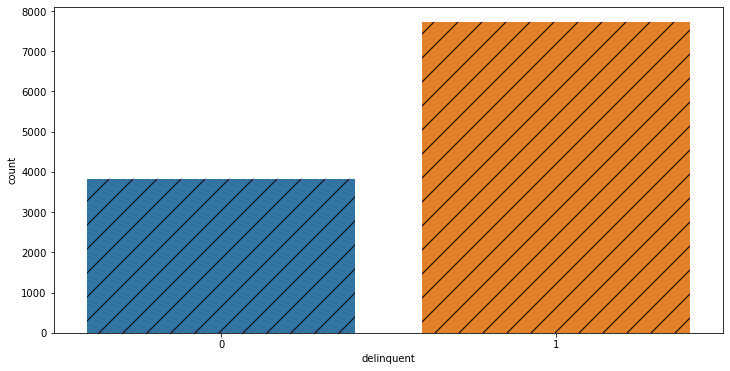

In [33]:
# Extracting the Delinquent
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'delinquent', hatch="/");


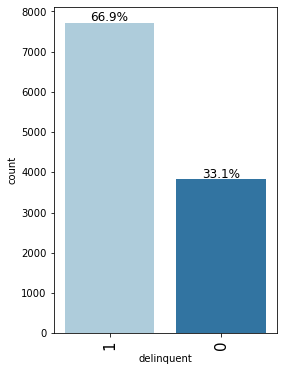

In [34]:
labeled_barplot(data, "delinquent", perc=True)

image.png

## Observations of Loan Term   

In [35]:
data["term"].value_counts(1)

36 months    0.916955
60 months    0.083045
Name: term, dtype: float64

In [36]:
data["term"].value_counts()

36 months    10589
60 months      959
Name: term, dtype: int64

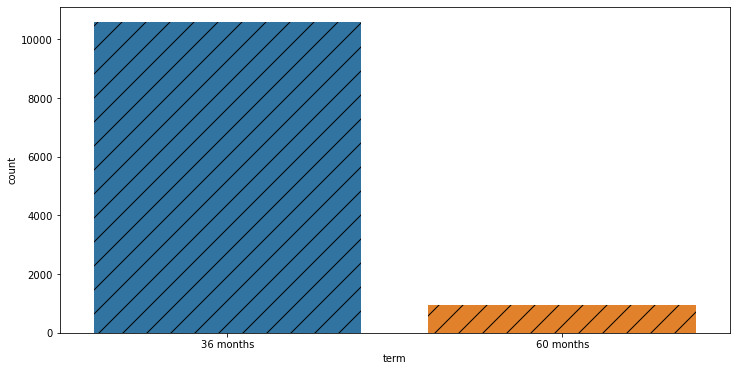

In [37]:
# Extracting the loan term
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'term', hatch="/");


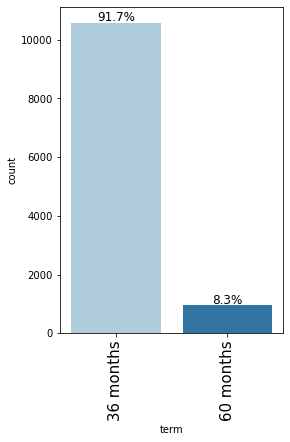

In [38]:
labeled_barplot(data, "term", perc=True)

image.png

## Observations of Gender

 

In [39]:
data["gender"].value_counts(1)

Male      0.567631
Female    0.432369
Name: gender, dtype: float64

In [40]:
data["gender"].value_counts()

Male      6555
Female    4993
Name: gender, dtype: int64

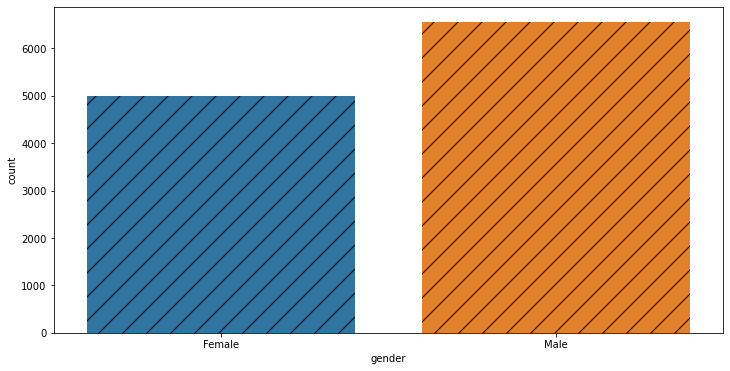

In [41]:
# Extracting the Gender
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'gender', hatch="/");


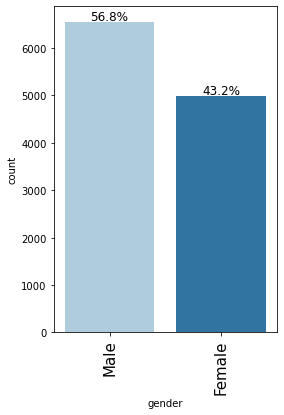

In [42]:
labeled_barplot(data, "gender", perc=True)

image.png

## Observations of Loan Purpose

In [43]:
data["loan_purpose"].value_counts(1)

House       0.596813
Car         0.180118
Other       0.080360
Personal    0.077243
Wedding     0.035331
Medical     0.023034
other       0.007101
Name: loan_purpose, dtype: float64

In [44]:
data["loan_purpose"].value_counts()

House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: loan_purpose, dtype: int64

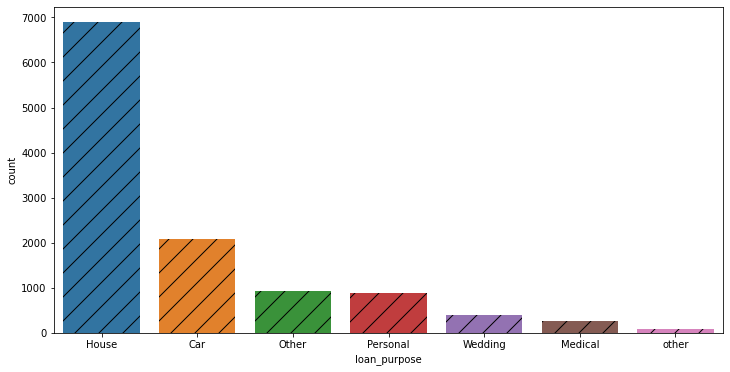

In [45]:
# Extracting the Loan Purpose
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'loan_purpose', hatch="/");


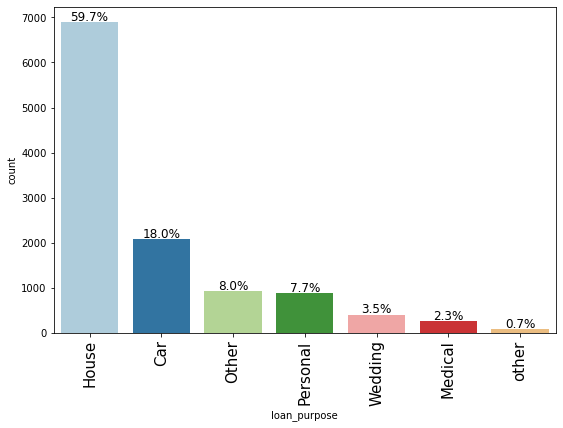

In [46]:
labeled_barplot(data, "loan_purpose", perc=True)

image.png

## Observations of Home Ownership

In [47]:
data["home_ownership"].value_counts(1)

Mortgage    0.472896
Rent        0.451680
Own         0.075424
Name: home_ownership, dtype: float64

In [48]:
data["home_ownership"].value_counts()

Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64

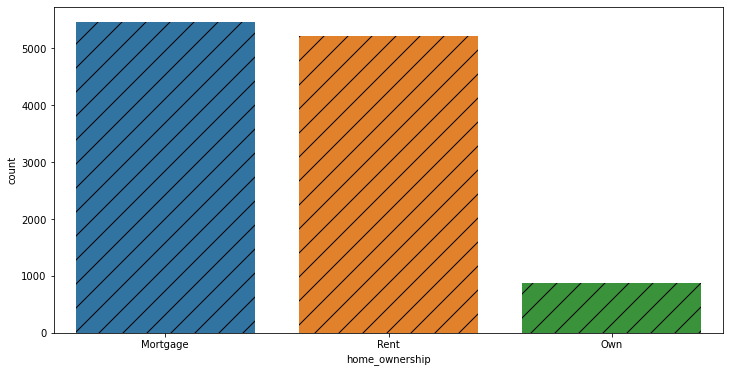

In [49]:
# Extracting the Home Ownership
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'home_ownership', hatch="/");


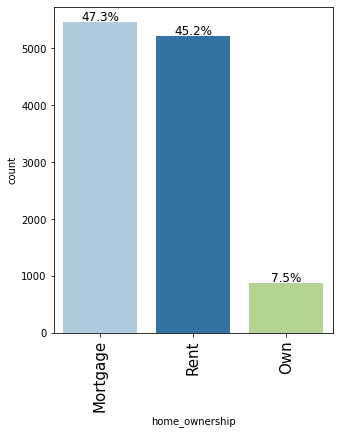

In [50]:
labeled_barplot(data, "home_ownership", perc=True)

image.png

## Observations of Age

In [51]:
data["age"].value_counts(1)

20-25    0.509872
>25      0.490128
Name: age, dtype: float64

In [52]:
data["age"].value_counts()

20-25    5888
>25      5660
Name: age, dtype: int64

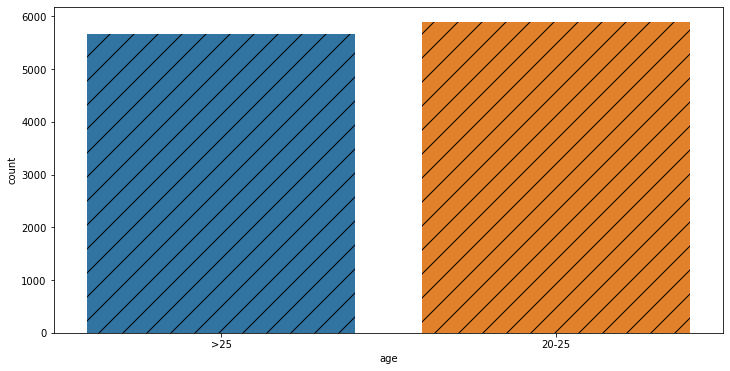

In [53]:
# Extracting the Age
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'age', hatch="/");


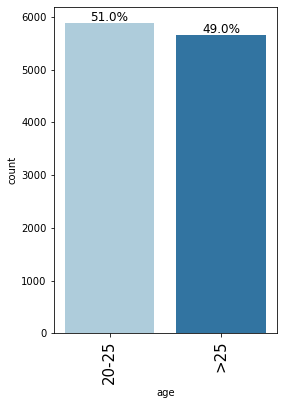

In [54]:
labeled_barplot(data, "age", perc=True)

image.png

### Observations of Credit Score

In [55]:
data["credit_score"].value_counts(1)

300-500    0.551611
>500       0.448389
Name: credit_score, dtype: float64

In [56]:
data["credit_score"].value_counts()

300-500    6370
>500       5178
Name: credit_score, dtype: int64

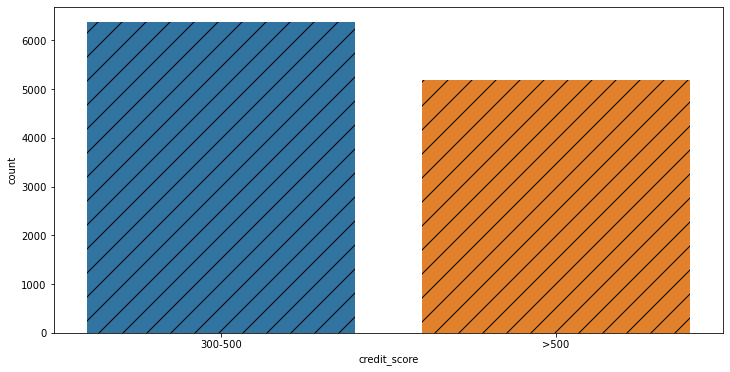

In [57]:
# Extracting the Credit Score
plt.subplots(figsize = (12,6))
sns.countplot(data = data, x = 'credit_score', hatch="/");


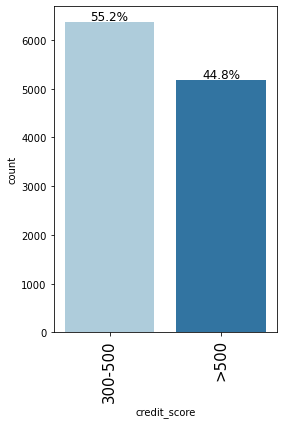

In [58]:
labeled_barplot(data, "credit_score", perc=True)

image.png

# Data Cleaning

In [59]:
data["loan_purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other'],
      dtype=object)

#### We can merge the purpose -  'other' and 'Other' together

In [60]:
data["loan_purpose"].replace("other", "Other", inplace=True)

In [61]:
data["loan_purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'],
      dtype=object)

image.png

# Bivariate Analysis

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   delinquent      11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   loan_purpose    11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   credit_score    11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


image.png

## Loan Term vs Delinquent

delinquent     0     1    All
term                         
All         3827  7721  11548
36 months   3168  7421  10589
60 months    659   300    959
------------------------------------------------------------------------------------------------------------------------


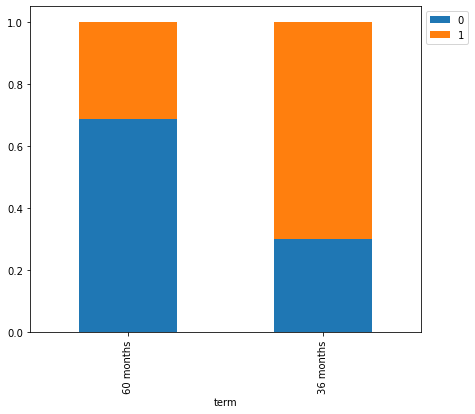

In [63]:
stacked_barplot(data, "term", "delinquent")

In [64]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["term"])
cont_tab

term,36 months,60 months
delinquent,,
0,3168,659
1,7421,300


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of loan term.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on loan term.

In [65]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["term"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

term        36 months  60 months
delinquent                      
0                3168        659
1                7421        300
The p-value is 1.4415944428788138e-131


#### Compare the p-value with $\alpha$

In [66]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 1.4415944428788138e-131 is less than the level of significance, 
 we have enough statistical evidence to reject the null hypothesis.


image.png

## Gender vs Delinquent

delinquent     0     1    All
gender                       
All         3827  7721  11548
Male        1977  4578   6555
Female      1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


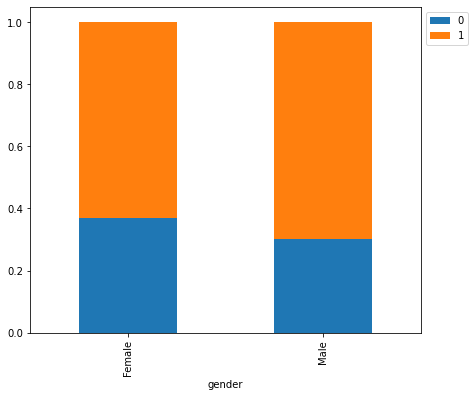

In [67]:
stacked_barplot(data, "gender", "delinquent")

In [68]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["gender"])
cont_tab

gender,Female,Male
delinquent,,
0,1850,1977
1,3143,4578


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of Gender.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on Gender.

In [69]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["gender"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

gender      Female  Male
delinquent              
0             1850  1977
1             3143  4578
The p-value is 7.58039662082723e-15


#### Compare the p-value with $\alpha$

In [70]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 7.58039662082723e-15 is less than the level of significance, 
 we have enough statistical evidence to reject the null hypothesis.


image.png

## Purpose vs Laon Delinquent

delinquent       0     1    All
loan_purpose                   
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


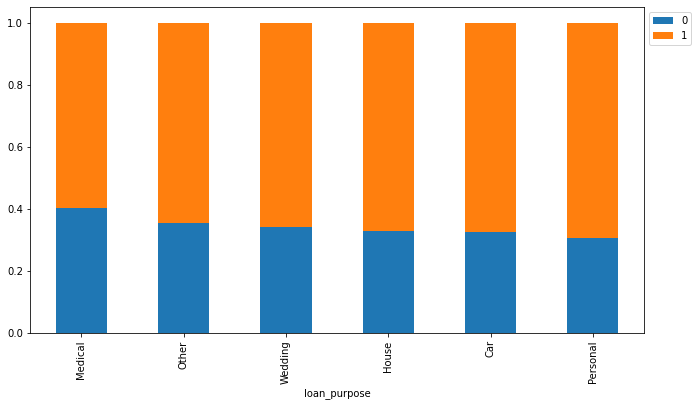

In [71]:
stacked_barplot(data, "loan_purpose", "delinquent")

In [72]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["loan_purpose"])
cont_tab

loan_purpose,Car,House,Medical,Other,Personal,Wedding
delinquent,,,,,,
0,678,2272,107,357,274,139
1,1402,4620,159,653,618,269


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of loan purpose.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on loan purpose.

In [73]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["loan_purpose"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

loan_purpose   Car  House  Medical  Other  Personal  Wedding
delinquent                                                  
0              678   2272      107    357       274      139
1             1402   4620      159    653       618      269
The p-value is 0.04867561690440916


#### Compare the p-value with $\alpha$

In [74]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 0.04867561690440916 is less than the level of significance, 
 we have enough statistical evidence to reject the null hypothesis.


image.png

## Home Ownership vs Delinquent

delinquent         0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


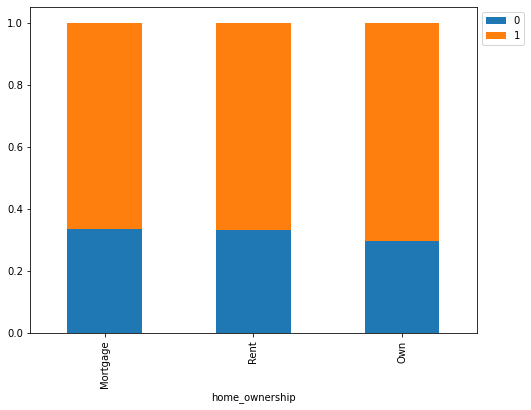

In [75]:
stacked_barplot(data, "home_ownership", "delinquent")

In [76]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["home_ownership"])
cont_tab

home_ownership,Mortgage,Own,Rent
delinquent,,,
0,1831,259,1737
1,3630,612,3479


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of Home Ownership.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on Home Ownership.

In [77]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["home_ownership"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

home_ownership  Mortgage  Own  Rent
delinquent                         
0                   1831  259  1737
1                   3630  612  3479
The p-value is 0.08255108300879616


#### Compare the p-value with $\alpha$

In [78]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 0.08255108300879616 is greater than the level of significance, 
 we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.


image.png

## Age vs Delinquent

delinquent     0     1    All
age                          
All         3827  7721  11548
>25         1969  3691   5660
20-25       1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


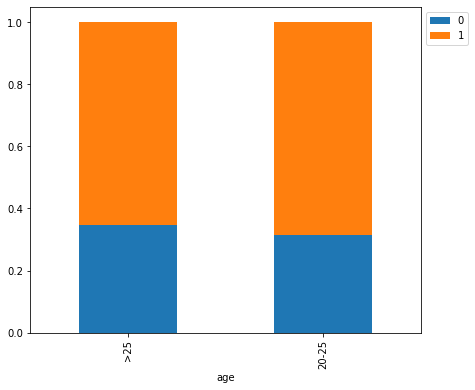

In [79]:
stacked_barplot(data, "age", "delinquent")

In [80]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["age"])
cont_tab

age,20-25,>25
delinquent,,
0,1858,1969
1,4030,3691


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of Age.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on Age.

In [81]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["age"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

age         20-25   >25
delinquent             
0            1858  1969
1            4030  3691
The p-value is 0.00024344886309971773


#### Compare the p-value with $\alpha$

In [82]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 0.00024344886309971773 is less than the level of significance, 
 we have enough statistical evidence to reject the null hypothesis.


* Customers between 20-25 years of age are more delinquent.

image.png

## Credit Score vs Delinquent

delinquent       0     1    All
credit_score                   
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


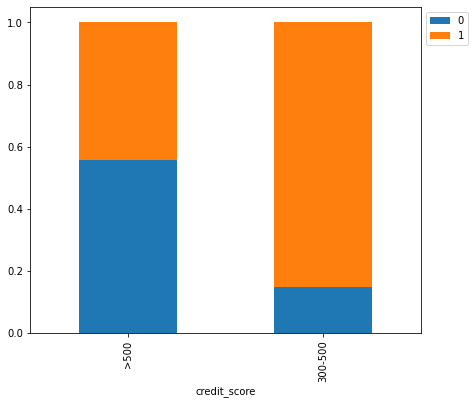

In [83]:
stacked_barplot(data, "credit_score", "delinquent")

In [84]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(data["delinquent"],data["credit_score"])
cont_tab

credit_score,300-500,>500
delinquent,,
0,941,2886
1,5429,2292


#### Null hypothesis:


>$H_0:$ Loan Delinquency is independent of Credit Score.

Alternate hypothesis:

>$H_a:$ Loan Delinquency depends on Credit Score.

In [85]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=data["delinquent"], columns=data["credit_score"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

credit_score  300-500  >500
delinquent                 
0                 941  2886
1                5429  2292
The p-value is 0.0


#### Compare the p-value with $\alpha$

In [86]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, \n we have enough statistical evidence to reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, \n we do not have enough statistical evidence to reject the null hypothesis. Hence, we fail to reject the null hypothesis.')

Since the p-value 0.0 is less than the level of significance, 
 we have enough statistical evidence to reject the null hypothesis.


image.png

image.png

# Data Preprocessing

### Data Preparation for Modeling

In [87]:
df=data.copy()

In [88]:
X = df.drop(["delinquent"], axis=1)
y = df["delinquent"]

In [89]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,term_60 months,gender_Male,loan_purpose_House,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Personal,loan_purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,credit_score_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


image.png

## Creating Training and Test Sets.**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [91]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6928
Number of rows in test data = 4620


In [92]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.677396
0    0.322604
Name: delinquent, dtype: float64
Percentage of classes in test set:
1    0.655411
0    0.344589
Name: delinquent, dtype: float64


image.png

### Summary of Training and Testing Observations

In [93]:
print("*" * 60)
print("Shape of Training set : ", X_train.shape)

print("*" * 60)
print("Shape of test set : ", X_test.shape)

print("*" * 60)
print("Percentage of classes in training set:")
print("*" * 60)
print(y_train.value_counts(normalize=True))
print("*" * 60)
print("Percentage of classes in test set:")

print(y_test.value_counts(normalize=True))
print("*" * 60)

************************************************************
Shape of Training set :  (6928, 11)
************************************************************
Shape of test set :  (4620, 11)
************************************************************
Percentage of classes in training set:
************************************************************
1    0.677396
0    0.322604
Name: delinquent, dtype: float64
************************************************************
Percentage of classes in test set:
1    0.655411
0    0.344589
Name: delinquent, dtype: float64
************************************************************


image.png

## Model Building - Decision Tree Model

### Build Decision Tree Model

In [94]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model performance evaluation

### Model can make wrong predictions as:
 
1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent). 


### Which case is more important? 

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

image.png

In [95]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [96]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(15, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

image.png

## Checking model performance on training set

In [97]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.855514,0.9088,0.881563,0.894974


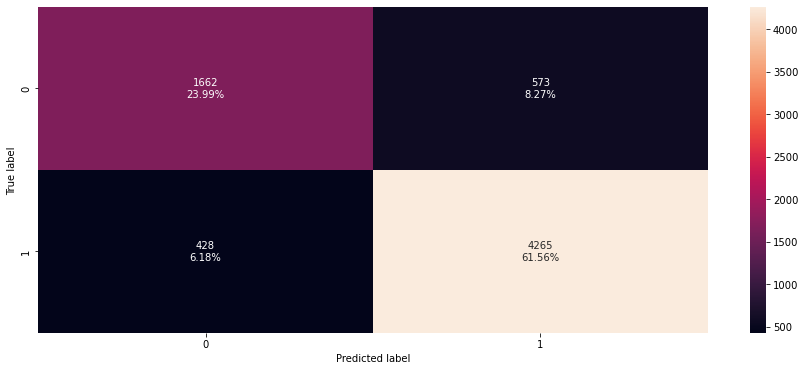

In [98]:
confusion_matrix_sklearn(model, X_train, y_train)

### Checking model performance on test set

In [99]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.843723,0.897292,0.868606,0.882716


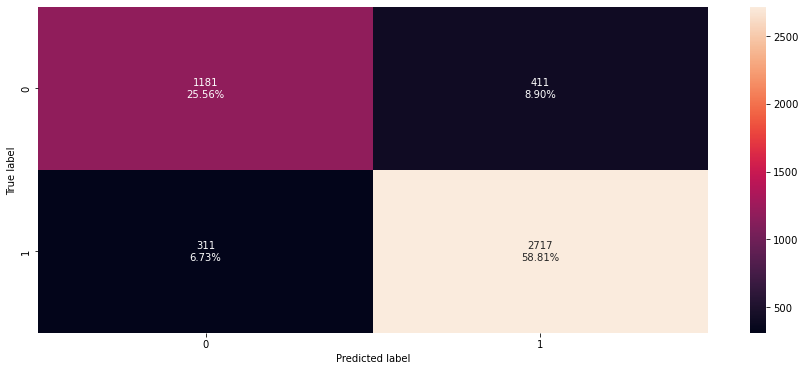

In [100]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

image.png

## Visualizing the Decision Tree

In [101]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'loan_purpose_House', 'loan_purpose_Medical', 'loan_purpose_Other', 'loan_purpose_Personal', 'loan_purpose_Wedding', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'credit_score_>500']


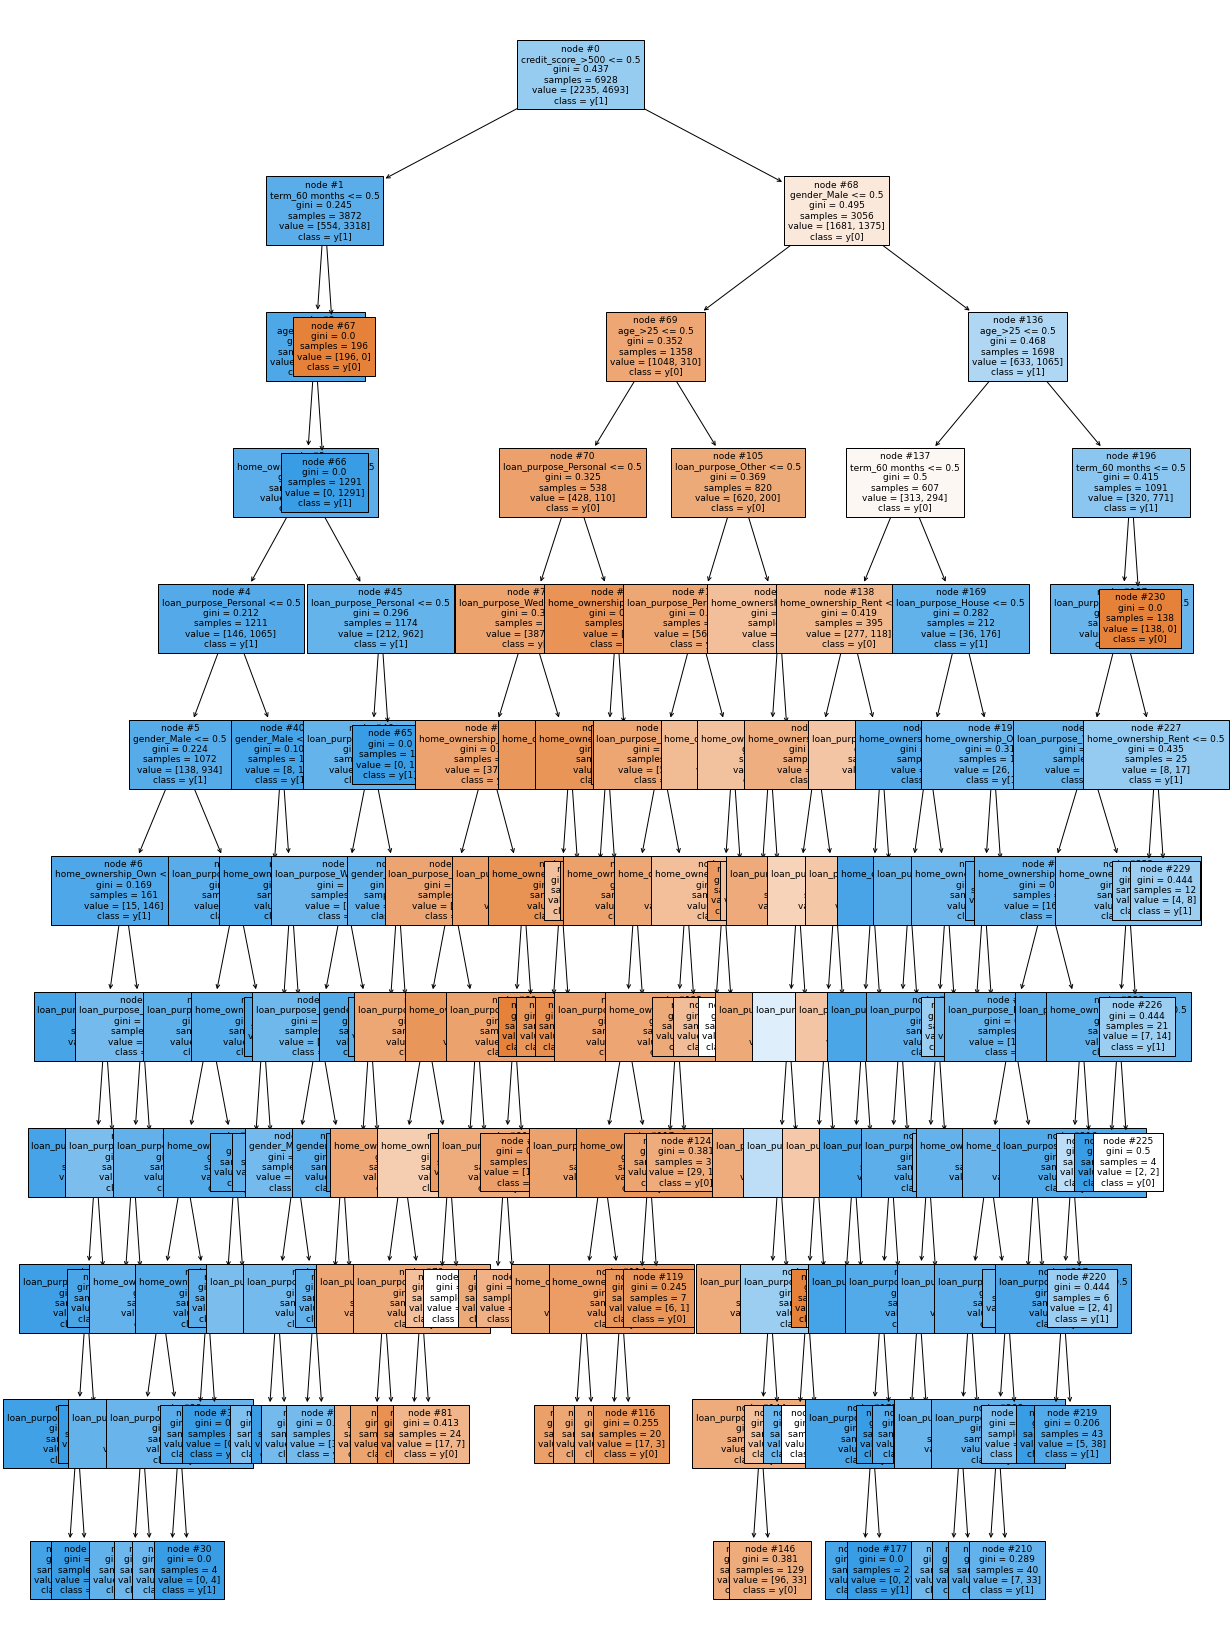

In [102]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [103]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- credit_score_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- age_>25 <= 0.50
|   |   |   |--- home_ownership_Rent <= 0.50
|   |   |   |   |--- loan_purpose_Personal <= 0.50
|   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |--- home_ownership_Own <= 0.50
|   |   |   |   |   |   |   |--- loan_purpose_Medical <= 0.50
|   |   |   |   |   |   |   |   |--- loan_purpose_House <= 0.50
|   |   |   |   |   |   |   |   |   |--- loan_purpose_Other <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- loan_purpose_Wedding <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 18.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- loan_purpose_Wedding >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |   |   |--- loan_purpose_Other >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |   |   |   |   |   |--- loan_purpose_House >  0.50

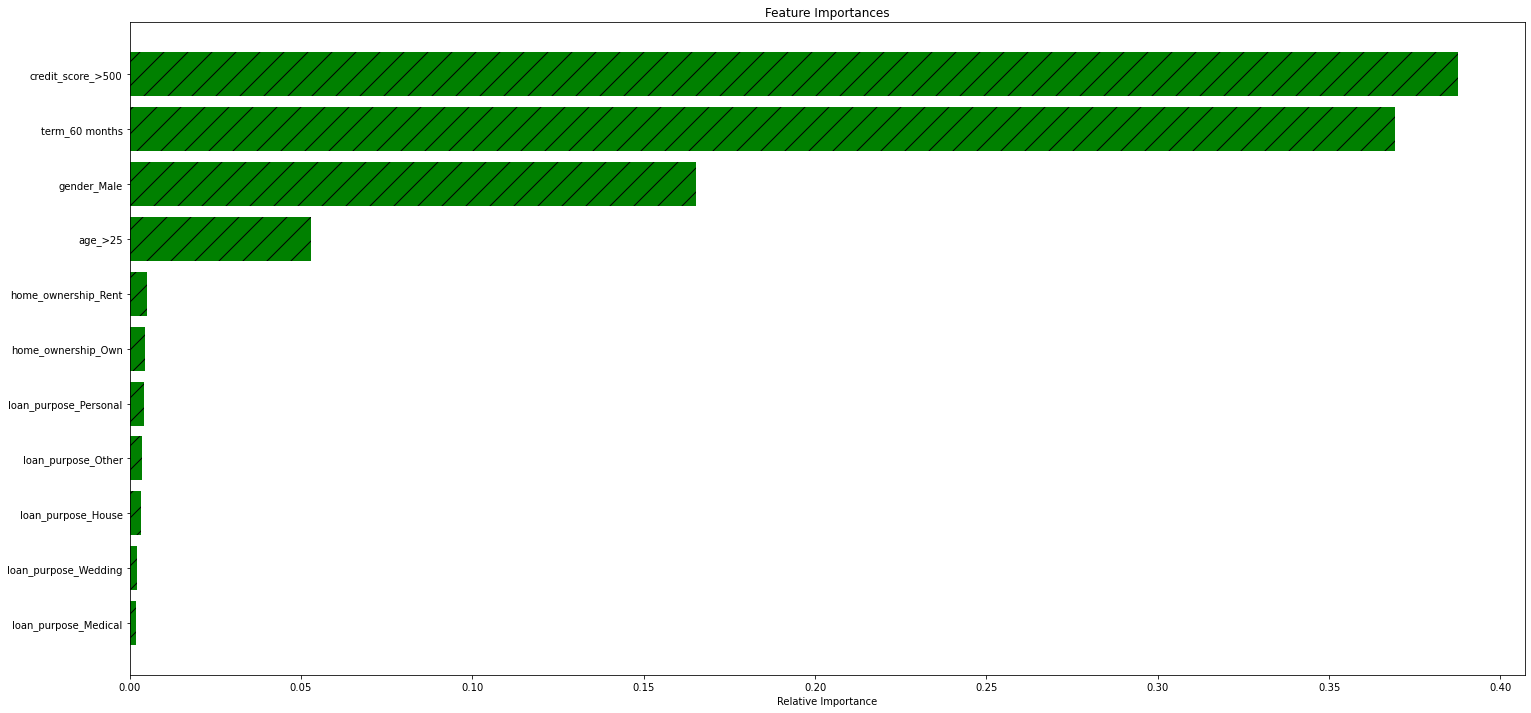

In [104]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(25, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center", hatch="/")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of loan and gender are the top 3 important features.

image.png

# Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

image.png

## Checking performance on training set

In [106]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.855225,0.910079,0.880256,0.894919


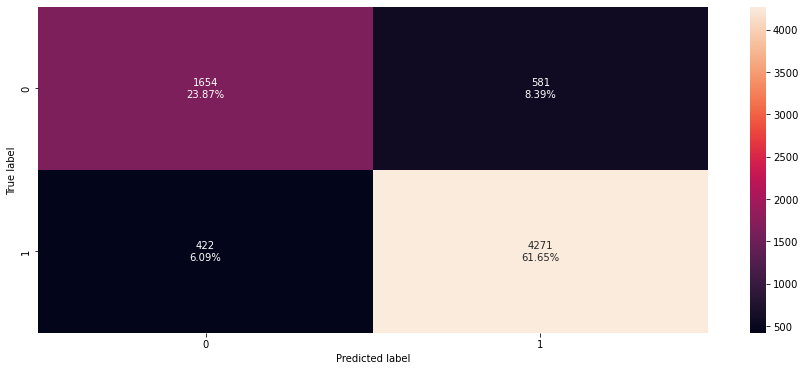

In [107]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

image.png

## Checking model performance on test set

In [108]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.843939,0.898613,0.867943,0.883012


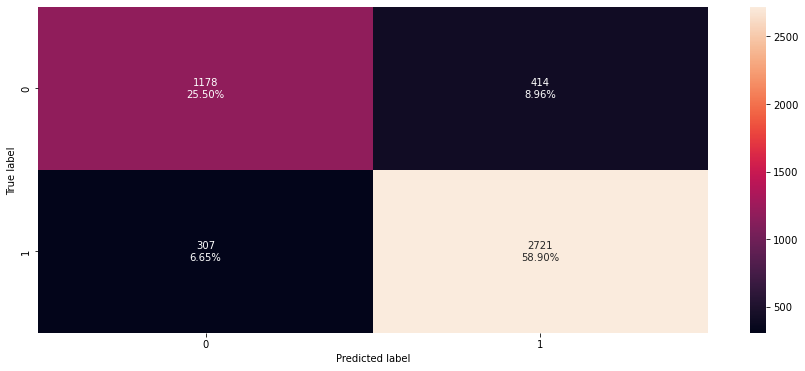

In [109]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

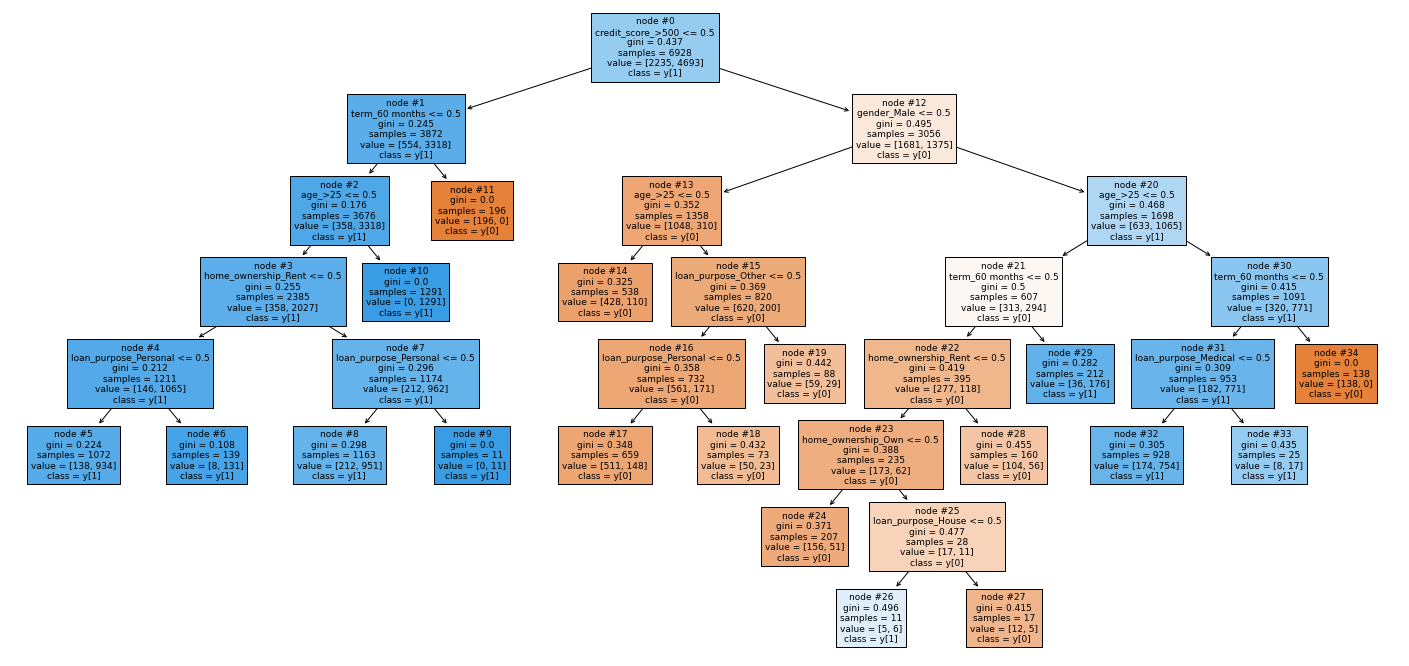

In [110]:
plt.figure(figsize=(25, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

image.png

## Cost Complexity Pruning

In [111]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [112]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.226403
1,0.000000e+00,0.226403
2,2.794668e-09,0.226403
3,2.244984e-07,0.226403
4,4.918264e-07,0.226404
5,6.998390e-07,0.226404
6,7.597561e-07,0.226405
7,1.058874e-06,0.226406
8,1.184343e-06,0.226407
9,1.386119e-06,0.226409


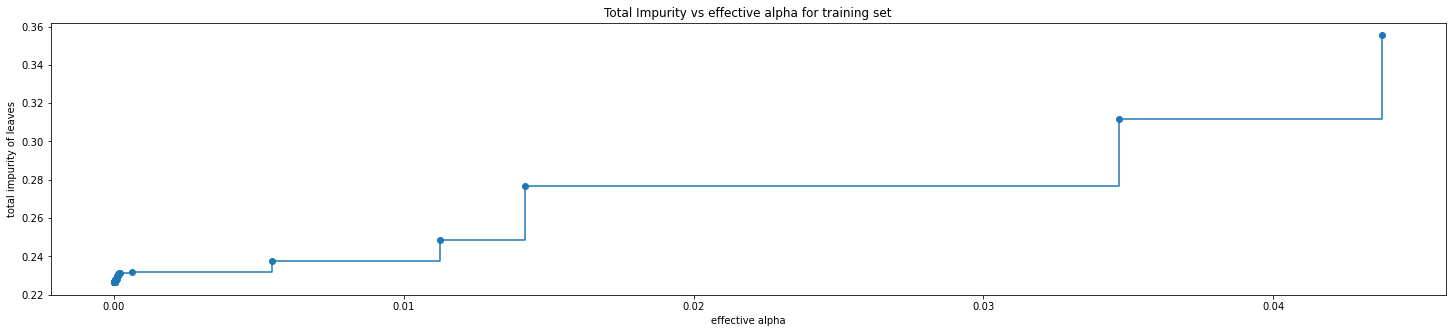

In [113]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08167024657332106



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

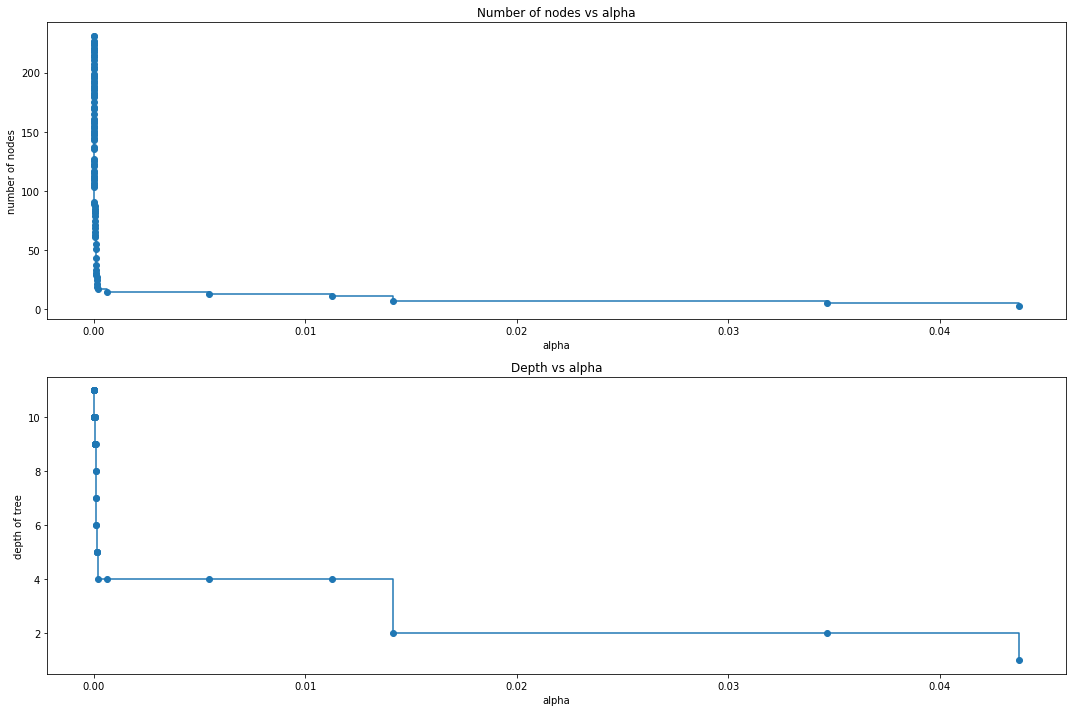

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

image.png

## Recall vs alpha for training and testing sets

In [116]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [117]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

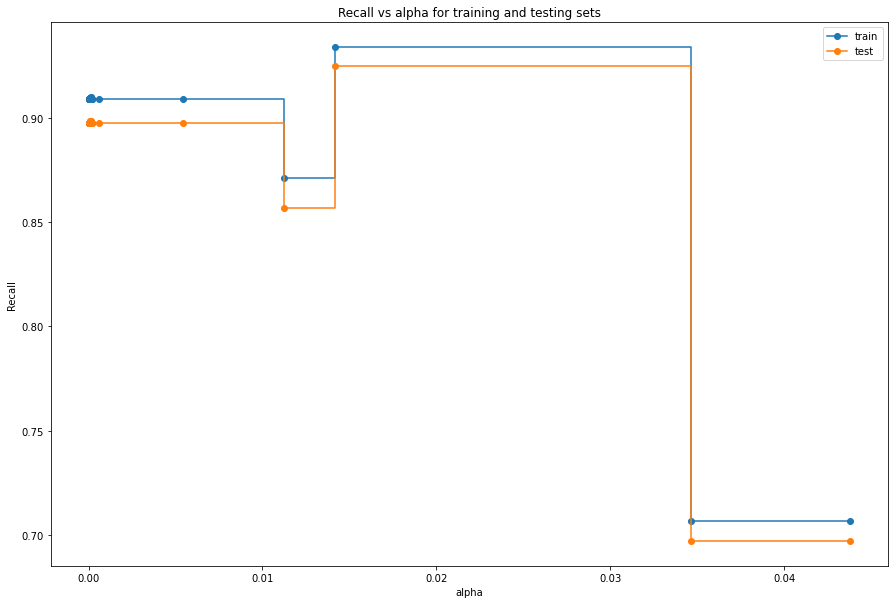

In [118]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [119]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014171370928955346, random_state=1)


### Checking model performance on training set

In [120]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.812211,0.933944,0.815594,0.870766


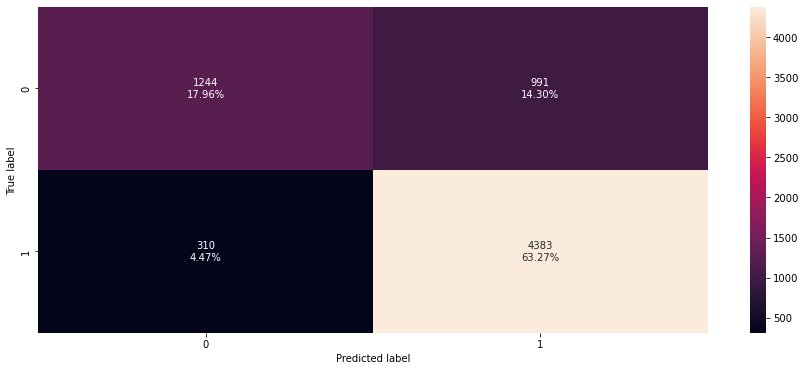

In [121]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Checking model performance on test set

In [122]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.798052,0.924703,0.798859,0.857187


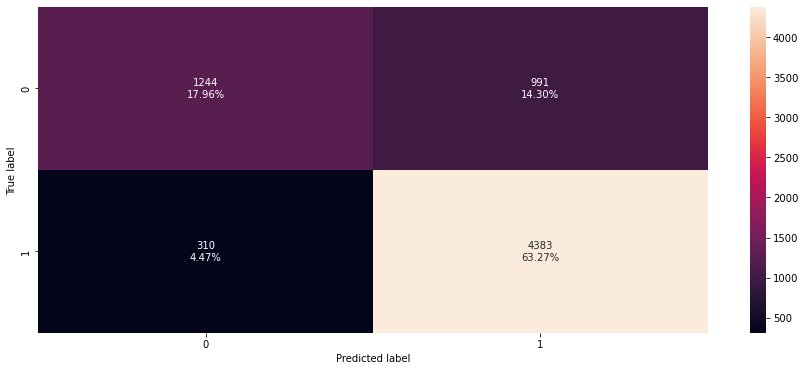

In [123]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

image.png

# Visualizing the Decision Tree

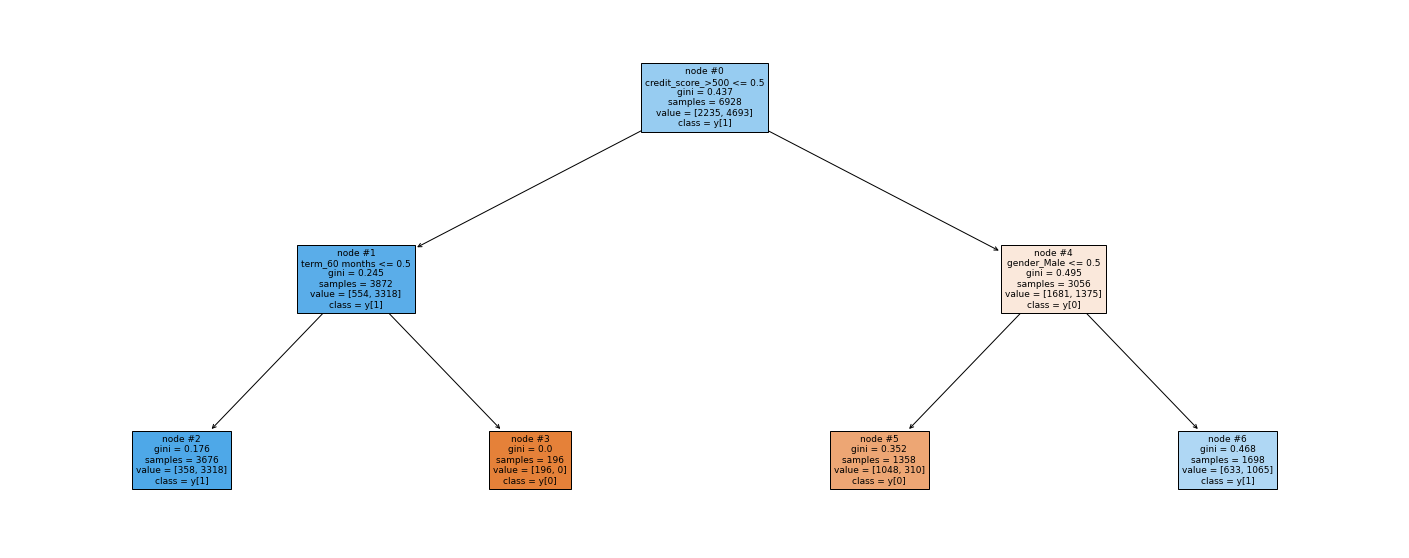

In [124]:
plt.figure(figsize=(25, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- credit_score_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- weights: [358.00, 3318.00] class: 1
|   |--- term_60 months >  0.50
|   |   |--- weights: [196.00, 0.00] class: 0
|--- credit_score_>500 >  0.50
|   |--- gender_Male <= 0.50
|   |   |--- weights: [1048.00, 310.00] class: 0
|   |--- gender_Male >  0.50
|   |   |--- weights: [633.00, 1065.00] class: 1



In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
credit_score_>500      0.510119
term_60 months         0.273355
gender_Male            0.216526
loan_purpose_House     0.000000
loan_purpose_Medical   0.000000
loan_purpose_Other     0.000000
loan_purpose_Personal  0.000000
loan_purpose_Wedding   0.000000
home_ownership_Own     0.000000
home_ownership_Rent    0.000000
age_>25                0.000000


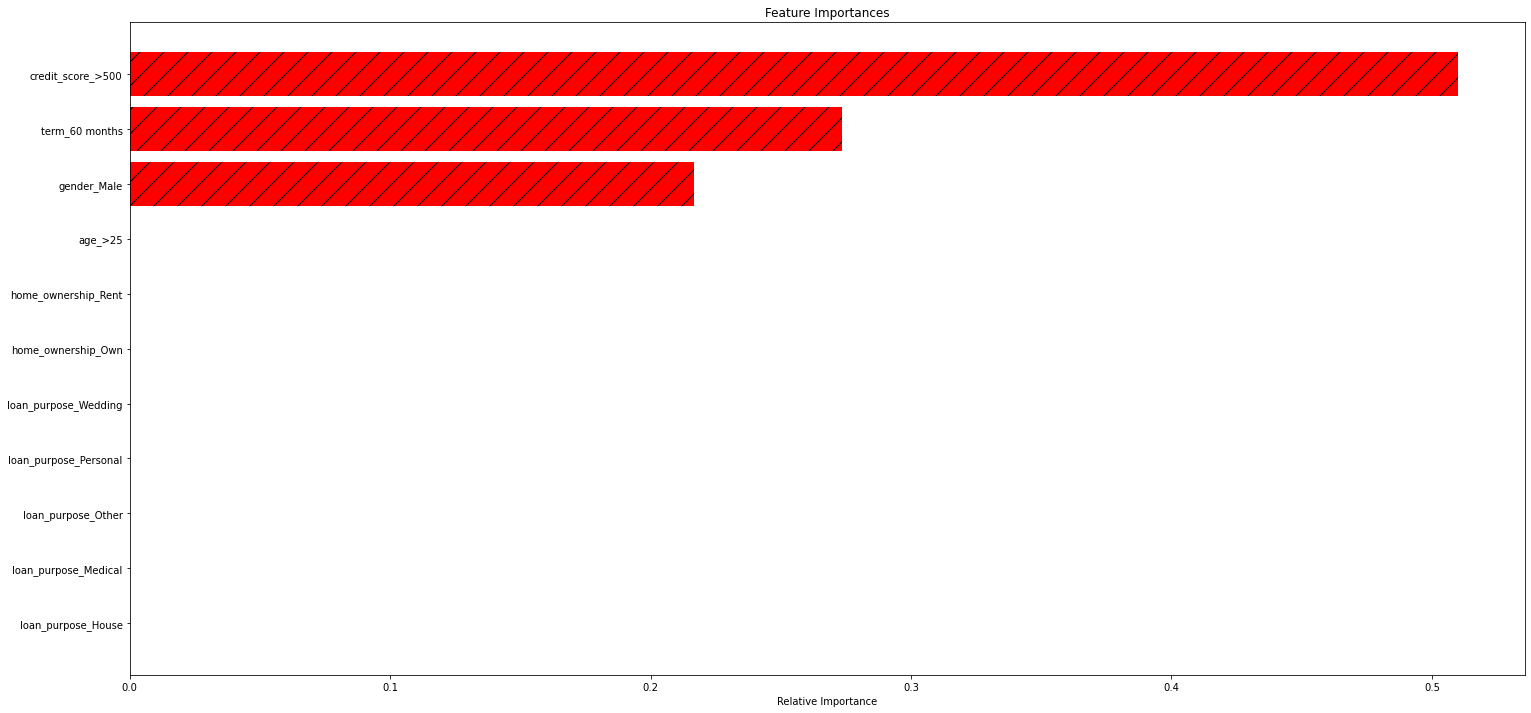

In [127]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(25, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center",hatch="/")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

image.png

## Comparison of Models and Final Model Selection

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.855514,0.855225,0.812211
Recall,0.908800,0.910079,0.933944
Precision,0.881563,0.880256,0.815594
F1,0.894974,0.894919,0.870766


In [129]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.843723,0.843939,0.798052
Recall,0.897292,0.898613,0.924703
Precision,0.868606,0.867943,0.798859
F1,0.882716,0.883012,0.857187


* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

image.png

image.png

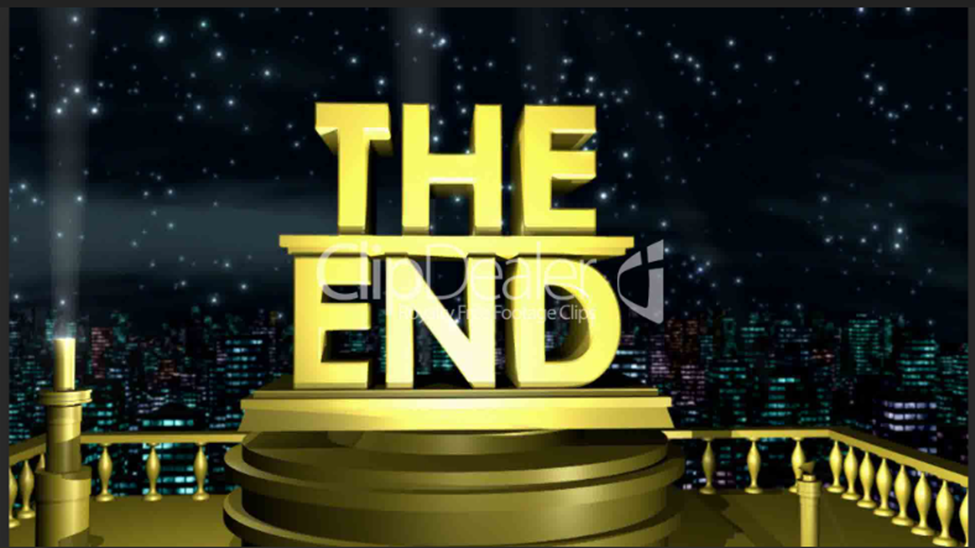